## comparing efficiency of searching by annotation vs substructure search

- section 1 verifies that the carnitines found by annotation are in fact carnitines by validating the presence of carnitine substructure
- section 2 compared efficiency of searching method on the original dataset

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd

In [2]:
import v_rdkit_functions
from v_rdkit_functions import mol_from_smiles_in_library
from v_rdkit_functions import substruct_search_from_smiles

In [18]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [3]:
# from v_carnitines_M+H_substruct_df_for_manuscript.ipynb

library_df_w_carnitine_substruc = pd.read_csv('/home/jovyan/work/notebooks/outputs/library_df_w_carnitine_substruc.csv', sep=',')

In [4]:
# from v_carnitines_M+H_name_df_for_manuscript.ipynb

library_df_w_carnitine_name = pd.read_csv('/home/jovyan/work/notebooks/outputs/library_df_carnitine_case_insen_M+H.csv', sep=',')

### substructure for identifying carnitine

In [5]:
carnitine_derivatives = "OC(C[N+](C)(C)C)CC=O"

In [6]:
carnitine_derivatives_mol = Chem.MolFromSmiles(carnitine_derivatives)

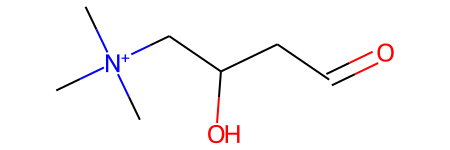

In [7]:
carnitine_derivatives_mol

### Section 1: Validation of carnitines identified by annotation by confirming presence of carnitine substructure

#### substructure matching

In [8]:
smiles_w_rdkit_obj_carnitine_name = mol_from_smiles_in_library(library_df_w_carnitine_name)

In [9]:
library_df_w_carnitine_name_and_substruct = substruct_search_from_smiles(library_df_w_carnitine_name, smiles_w_rdkit_obj_carnitine_name, carnitine_derivatives)

In [10]:
library_df_w_carnitine_name_and_substruct

,index,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
0,4046,CCMSLIB00004684226,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,10bf09df91cd4bc49f11f9d042619262,1145,2,GNPS-LIBRARY,1,"[[78.831253,48.000000],[81.134575,89.000000],[...",null-null-null-null,...,Positive,2018-09-18 16:17:01.0,fc87812c8b0f4d85811fcb06172d3d60,NaN,LZOSYCMHQXPBFU-UHFFFAOYSA-N,NaN,C17H33NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
1,4047,CCMSLIB00004684227,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,bf7f0b1faf244732b25797393a0c8bfe,1306,2,GNPS-LIBRARY,1,"[[81.067673,58.000000],[81.868629,39.000000],[...",null-null-null-null,...,Positive,2018-09-18 16:16:43.0,84a4551c00454d7dadf16212716efcfa,NaN,XOMRRQXKHMYMOC-UHFFFAOYSA-O,NaN,C23H46NO4+,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
2,4048,CCMSLIB00004684228,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,a1c8ea94dcb2408aacf28b0a6b499e70,1604,2,GNPS-LIBRARY,1,"[[76.025177,28.000000],[76.907547,37.000000],[...",null-null-null-null,...,Positive,2018-09-18 16:16:04.0,348e88fbeac0477dabad132e9bee2e67,NaN,XOMRRQXKHMYMOC-UHFFFAOYSA-N,NaN,C23H45NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
3,4049,CCMSLIB00004684229,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,1d3b324f1cf24c119a520d1633e83122,1548,2,GNPS-LIBRARY,1,"[[77.038208,52.000000],[79.039864,68.000000],[...",null-null-null-null,...,Positive,2018-09-18 16:15:35.0,0c9c258babc44e4d9354d1ceee93b376,NaN,SEXHTZQULWPHBX-UHFFFAOYSA-N,NaN,C27H45NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
4,4050,CCMSLIB00004684230,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,d83a0ab3796a47db81fa17fcccb28f64,1538,2,GNPS-LIBRARY,1,"[[82.021034,18.000000],[82.307793,40.000000],[...",null-null-null-null,...,Positive,2018-09-18 16:36:46.0,778bf693a1024b7e9d249443e967aeb5,NaN,MJLXQSQYKZWZCB-UHFFFAOYSA-N,NaN,C25H45NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,577880,CCMSLIB00006121167,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5049,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[60.080601,62910528.000000],[85.028198,655002...",null-null-null-null,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,RDHQFKQIGNGIED-MRVPVSSYSA-N,NaN,C9H17NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
1327,577881,CCMSLIB00006121169,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5050,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[57.792702,2138579.000000],[60.077400,2803314...",null-null-null-null,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,RDHQFKQIGNGIED-MRVPVSSYSA-N,NaN,C9H17NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
1328,577882,CCMSLIB00006121170,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5051,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[60.080601,50613920.000000],[73.382797,201758...",null-null-null-null,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,RDHQFKQIGNGIED-MRVPVSSYSA-N,NaN,C9H17NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
1329,577883,CCMSLIB00006121172,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5052,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[52.450199,2231351.000000],[59.031700,2142775...",null-null-null-null,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,RDHQFKQIGNGIED-MRVPVSSYSA-N,NaN,C9H17NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrar

In [26]:
len(library_df_w_carnitine_name_and_substruct.Smiles.dropna().unique())

74

In [27]:
len(library_df_w_carnitine_name.Smiles.dropna().unique())

80

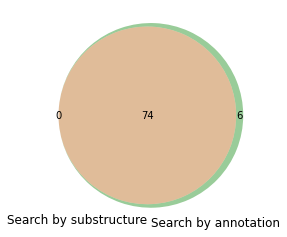

In [28]:
venn2([set(library_df_w_carnitine_name_and_substruct.Smiles.dropna().unique()), set(library_df_w_carnitine_name.Smiles.dropna().unique())],
      set_labels = ('Search by substructure', 'Search by annotation'))
plt.show()

In [29]:
set(library_df_w_carnitine_name.Smiles.dropna().unique())-set(library_df_w_carnitine_name_and_substruct.Smiles.dropna().unique())

{'C[N+](C)(C)CCCC(=O)O',
 'C[N+](C)(C)CCCC(=O)[O-]',
 'C[N+](C)(C)CCCC([O-])=O',
 'C[N+](C)(CCCC([O-])=O)C',
 'OC(=O)[C@@H](N)CC[S+1](C)C[C@@H](O1)[C@@H](O)[C@@H](O)[C@@H]1n(c3)c(n2)c(n3)c(N)nc2',
 '[O-1]C(=O)C(N)CC[S+1](C)CC(O1)C(O)C(O)C1n(c3)c(n2)c(n3)c(N)nc2'}

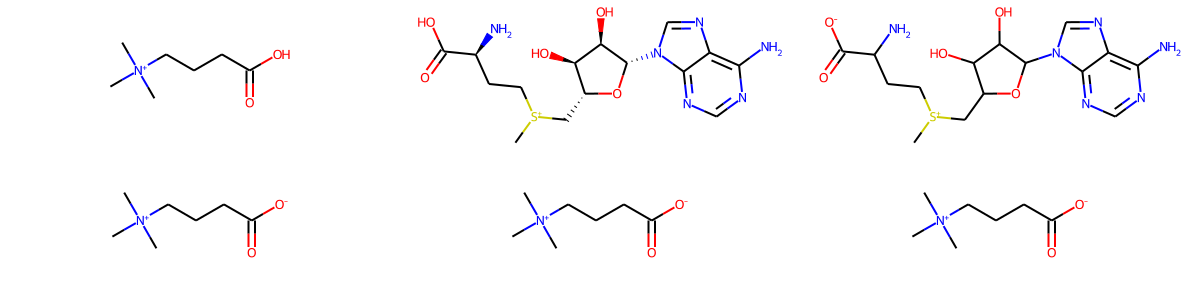

In [30]:
not_substruct_matched = [Chem.MolFromSmiles(x) for x in 
                                           set(library_df_w_carnitine_name.Smiles.dropna().unique())-set(library_df_w_carnitine_name_and_substruct.Smiles.dropna().unique())]
Draw.MolsToGridImage(not_substruct_matched,subImgSize=(400,150), useSVG = True)

#### describe spectrum that are not substructure matched

In [35]:
spectrum_id_not_subctruct_matched = list(set(library_df_w_carnitine_name.spectrum_id.unique())-set(library_df_w_carnitine_name_and_substruct.spectrum_id.unique()))

In [42]:
library_df_w_carnitine_name[library_df_w_carnitine_name['spectrum_id'].isin(spectrum_id_not_subctruct_matched)]['Smiles'].unique()

array(['C[N+](C)(C)CCCC([O-])=O', 'C[N+](C)(CCCC([O-])=O)C',
       'C[N+](C)(C)CCCC(=O)O', nan,
       '[O-1]C(=O)C(N)CC[S+1](C)CC(O1)C(O)C(O)C1n(c3)c(n2)c(n3)c(N)nc2',
       'OC(=O)[C@@H](N)CC[S+1](C)C[C@@H](O1)[C@@H](O)[C@@H](O)[C@@H]1n(c3)c(n2)c(n3)c(N)nc2',
       'C[N+](C)(C)CCCC(=O)[O-]'], dtype=object)

In [62]:
library_df_w_carnitine_name[library_df_w_carnitine_name['spectrum_id'].isin(spectrum_id_not_subctruct_matched)]['Smiles'].value_counts(dropna=False)

NaN                                                                                    955
C[N+](C)(C)CCCC(=O)[O-]                                                                  8
C[N+](C)(C)CCCC([O-])=O                                                                  7
[O-1]C(=O)C(N)CC[S+1](C)CC(O1)C(O)C(O)C1n(c3)c(n2)c(n3)c(N)nc2                           6
OC(=O)[C@@H](N)CC[S+1](C)C[C@@H](O1)[C@@H](O)[C@@H](O)[C@@H]1n(c3)c(n2)c(n3)c(N)nc2      6
C[N+](C)(CCCC([O-])=O)C                                                                  1
C[N+](C)(C)CCCC(=O)O                                                                     1
Name: Smiles, dtype: int64

In [66]:
smiles_not_substruct_matched = library_df_w_carnitine_name[library_df_w_carnitine_name['spectrum_id'].isin(spectrum_id_not_subctruct_matched)]['Smiles'].dropna().unique()

In [69]:
library_df_w_carnitine_name[library_df_w_carnitine_name['Smiles'].isin(smiles_not_substruct_matched)].spectrum_id.to_list()

['CCMSLIB00005884227',
 'CCMSLIB00005884228',
 'CCMSLIB00005884229',
 'CCMSLIB00005884230',
 'CCMSLIB00005884231',
 'CCMSLIB00005884232',
 'CCMSLIB00000577974',
 'CCMSLIB00005464019',
 'CCMSLIB00005720412',
 'CCMSLIB00000216197',
 'CCMSLIB00000216199',
 'CCMSLIB00000216201',
 'CCMSLIB00000216407',
 'CCMSLIB00000216409',
 'CCMSLIB00000216411',
 'CCMSLIB00000216629',
 'CCMSLIB00000216631',
 'CCMSLIB00000216633',
 'CCMSLIB00000216635',
 'CCMSLIB00000216638',
 'CCMSLIB00000221107',
 'CCMSLIB00006679523',
 'CCMSLIB00006679781',
 'CCMSLIB00006681727',
 'CCMSLIB00006681988',
 'CCMSLIB00006682560',
 'CCMSLIB00006682832',
 'CCMSLIB00006683333',
 'CCMSLIB00006683988']

### Section 2: Efficiency of searching method on original dataset

#### identifying carnitines by substructure vs annnotation on original dataset

In [70]:
# from v_get_ALL_GNPS_input_library.ipynb

input_library_full_df_loaded = pd.read_parquet('/home/jovyan/work/notebooks/outputs/ALL_GNPS_input_library.gzip')

In [71]:
adduct_labels = ['M+H','[M+H]','[M+H]+']

In [72]:
input_library = input_library_full_df_loaded[input_library_full_df_loaded["Adduct"].isin(adduct_labels)]

In [73]:
len(input_library)

288096

In [74]:
smiles_w_rdkit_obj_input_library = mol_from_smiles_in_library(input_library)

[22:24:49] SMILES Parse Error: syntax error while parsing: N/A
[22:24:49] SMILES Parse Error: Failed parsing SMILES 'N/A' for input: 'N/A'
[22:24:50] SMILES Parse Error: syntax error while parsing: 
[22:24:50] SMILES Parse Error: Failed parsing SMILES ' ' for input: ' '
[22:24:50] SMILES Parse Error: syntax error while parsing: N/A
[22:24:50] SMILES Parse Error: Failed parsing SMILES ' N/A' for input: ' N/A'
[22:24:50] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)
[22:24:50] SMILES Parse Error: Failed parsing SMILES ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)' for input: ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)'
[22:24:50] Can't kekulize mol.  Unkekulized atoms: 10 11 12 14 16
[22:24:50] Explicit valence for atom # 22 O, 3, is greater than permitte

In [75]:
input_library_carnitine_derivatives = substruct_search_from_smiles(input_library, smiles_w_rdkit_obj_input_library, carnitine_derivatives)

In [76]:
input_library_carnitine_derivatives

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
4046,CCMSLIB00004684226,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,10bf09df91cd4bc49f11f9d042619262,1145,2,GNPS-LIBRARY,1,"[[78.831253,48.000000],[81.134575,89.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:17:01.0,fc87812c8b0f4d85811fcb06172d3d60,null,LZOSYCMHQXPBFU-UHFFFAOYSA-N,,C17H33NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
4047,CCMSLIB00004684227,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,bf7f0b1faf244732b25797393a0c8bfe,1306,2,GNPS-LIBRARY,1,"[[81.067673,58.000000],[81.868629,39.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:16:43.0,84a4551c00454d7dadf16212716efcfa,null,XOMRRQXKHMYMOC-UHFFFAOYSA-O,,C23H46NO4+,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
4048,CCMSLIB00004684228,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,a1c8ea94dcb2408aacf28b0a6b499e70,1604,2,GNPS-LIBRARY,1,"[[76.025177,28.000000],[76.907547,37.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:16:04.0,348e88fbeac0477dabad132e9bee2e67,null,XOMRRQXKHMYMOC-UHFFFAOYSA-N,,C23H45NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
4049,CCMSLIB00004684229,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,1d3b324f1cf24c119a520d1633e83122,1548,2,GNPS-LIBRARY,1,"[[77.038208,52.000000],[79.039864,68.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:15:35.0,0c9c258babc44e4d9354d1ceee93b376,null,SEXHTZQULWPHBX-UHFFFAOYSA-N,,C27H45NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
4050,CCMSLIB00004684230,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,d83a0ab3796a47db81fa17fcccb28f64,1538,2,GNPS-LIBRARY,1,"[[82.021034,18.000000],[82.307793,40.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:36:46.0,778bf693a1024b7e9d249443e967aeb5,null,MJLXQSQYKZWZCB-UHFFFAOYSA-N,,C25H45NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577880,CCMSLIB00006121167,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5049,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[60.080601,62910528.000000],[85.028198,655002...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,RDHQFKQIGNGIED-MRVPVSSYSA-N,,C9H17NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
577881,CCMSLIB00006121169,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5050,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[57.792702,2138579.000000],[60.077400,2803314...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,RDHQFKQIGNGIED-MRVPVSSYSA-N,,C9H17NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
577882,CCMSLIB00006121170,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5051,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[60.080601,50613920.000000],[73.382797,201758...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,RDHQFKQIGNGIED-MRVPVSSYSA-N,,C9H17NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
577883,CCMSLIB00006121172,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5052,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[52.450199,2231351.000000],[59.031700,2142775...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,RDHQFKQIGNGIED-MRVPVSSYSA-N,,C9H17NO4,,https://gnps.ucsd.edu/ProteoSA

In [82]:
len(input_library_carnitine_derivatives['Smiles'].dropna().unique())

75

#### venn diagram of captured smiles

In [ ]:
library_df_w_carnitine_name['Smiles'].dropna().unique()

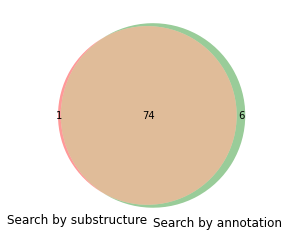

In [83]:
venn2([set(input_library_carnitine_derivatives['Smiles'].dropna().unique()), set(library_df_w_carnitine_name['Smiles'].dropna().unique())],
      set_labels = ('Search by substructure', 'Search by annotation'))
plt.show()

#### describe spectra that are not matched by annotation

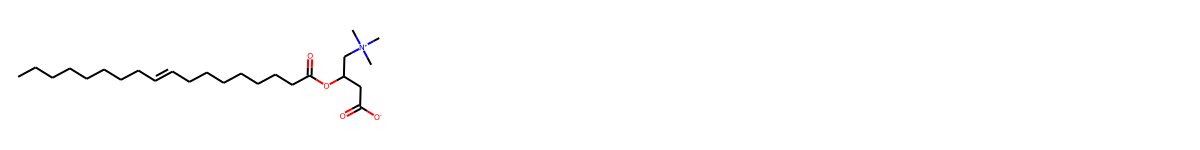

In [85]:
input_library_not_annotation_matched = [Chem.MolFromSmiles(x) for x in 
                                           set(input_library_carnitine_derivatives['Smiles'].dropna().unique())-set(library_df_w_carnitine_name['Smiles'].dropna().unique())]
Draw.MolsToGridImage(input_library_not_annotation_matched,subImgSize=(400,150), useSVG = True)

In [86]:
set(input_library_carnitine_derivatives['Smiles'].dropna().unique())-set(library_df_w_carnitine_name['Smiles'].dropna().unique())

{'CCCCCCCCC=CCCCCCCCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C'}

In [87]:
input_library_carnitine_derivatives[input_library_carnitine_derivatives['Smiles'] =='CCCCCCCCC=CCCCCCCCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C']['Compound_Name']

91824    CAR_18_1
91828    CAR_18_1
Name: Compound_Name, dtype: object